## 1.Data Preparation
- Preprocess Images and mask

In [17]:
!python3 main.py

Image batch shape: torch.Size([16, 3, 256, 256])
Mask batch shape: torch.Size([16, 1, 256, 256])


- Visualize batch of train dataset

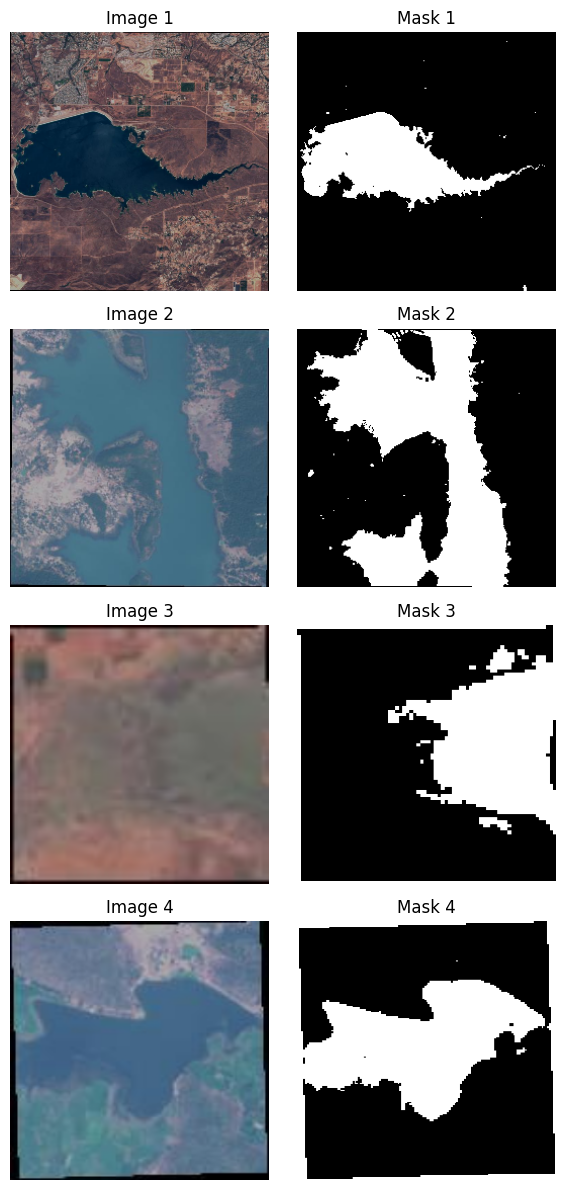

In [20]:
# visualize_batch.py
import matplotlib.pyplot as plt
import torch
from utils.data_utils import WaterBodiesDataset
from torch.utils.data import DataLoader
import os, glob
from sklearn.model_selection import train_test_split

# Load and sort image/mask paths
image_paths = sorted(glob.glob("datasets/train/images/*"))
mask_paths = sorted(glob.glob("datasets/train/masks/*"))

# Small split just for demo
train_imgs, _, train_masks, _ = train_test_split(
    image_paths, mask_paths, test_size=0.99, random_state=42)

# Dataset and loader
dataset = WaterBodiesDataset(train_imgs, train_masks)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Get one batch
images, masks = next(iter(loader))

# Plot 4 examples
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i in range(4):
    img = images[i].permute(1, 2, 0).numpy()  # CHW -> HWC
    mask = masks[i].squeeze(0).numpy()        # [1, H, W] -> [H, W]

    axs[i, 0].imshow(img)
    axs[i, 0].set_title(f"Image {i+1}")
    axs[i, 0].axis('off')

    axs[i, 1].imshow(mask, cmap='gray')
    axs[i, 1].set_title(f"Mask {i+1}")
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()